# Insurance Claim Prediction with Tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Data Preprocessing Part 1

In [ ]:
# Remove unused columns
df.drop(columns='_c39', inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
unique_counts = df[object_columns].nunique()

print("Unique value counts for object datatype columns:")
print(unique_counts)

Unique value counts for object datatype columns:
policy_bind_date            951
policy_state                  3
policy_csl                    3
insured_sex                   2
insured_education_level       7
insured_occupation           14
insured_hobbies              20
insured_relationship          6
incident_date                60
incident_type                 4
collision_type                4
incident_severity             4
authorities_contacted         5
incident_state                7
incident_city                 7
incident_location          1000
property_damage               3
police_report_available       3
auto_make                    14
auto_model                   39
fraud_reported                2
dtype: int64


# Extracting first four characters from 'policy_bind_date' column and converting to integer also remove unused columns

In [ ]:
df['policy_bind_date'] = df['policy_bind_date'].str[:4].astype(int)
df.drop(columns=['incident_date', 'incident_location'], inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Cluster the unique values from the 'auto_model' column into 5 to 7 categories

In [ ]:
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [ ]:
# Define a function to cluster unique values
def cluster_auto_model(model):
    if model in ['92x', 'E400', 'A5', '3 Series', 'C300', 'M5', 'X5', 'X6', 'Fusion', 'Jetta', 'ML350']:
        return 'Luxury/Sports'
    elif model in ['RAM', 'Tahoe', 'Highlander', 'Escape', 'Silverado', 'Wrangler', 'Malibu', 'Ultima', 'Grand Cherokee']:
        return 'SUV/Truck'
    elif model in ['95', 'Neon', 'Legacy', 'Impreza', 'Forrestor']:
        return 'Sedan/Wagon'
    elif model in ['Pathfinder', 'MDX', 'Maxima', 'TL', 'CRV', 'Accord', 'Passat']:
        return 'Midsize SUV/Sedan'
    elif model in ['Camry', 'F150', 'A3', 'Corolla', 'Civic']:
        return 'Compact Car/Truck'
    else:
        return 'Other'

# Apply the clustering function to 'auto_model' column
df['auto_model'] = df['auto_model'].apply(cluster_auto_model)

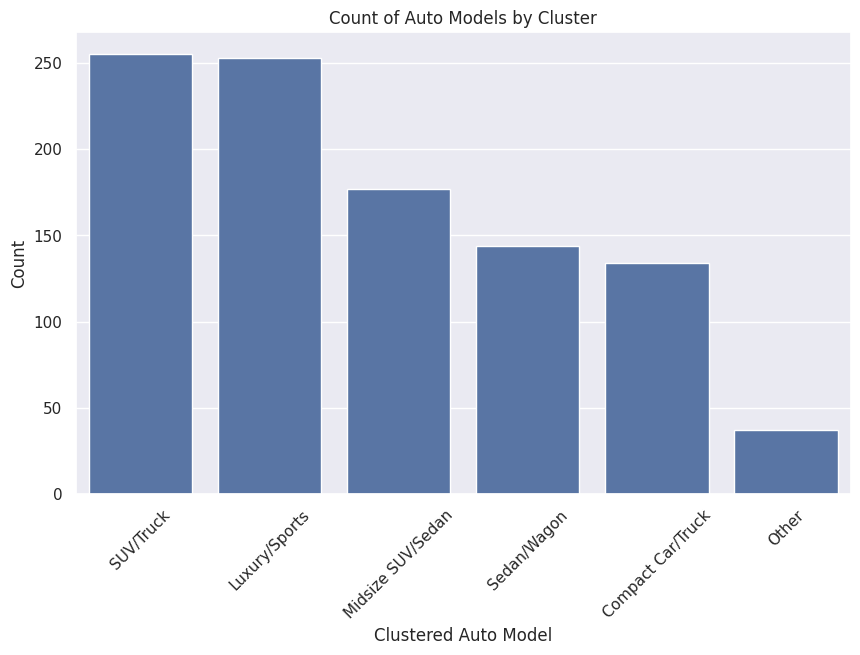

In [ ]:
# Countplot visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='auto_model', order=df['auto_model'].value_counts().index)
plt.title('Count of Auto Models by Cluster')
plt.xlabel('Clustered Auto Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Change all of the '?' variable to be 'unknown'
df.replace('?', 'unknown', inplace=True)

In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,Luxury/Sports,2004,Y
1,228,42,342868,2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,unknown,Minor Damage,Police,VA,Riverwood,8,1,unknown,0,0,unknown,5070,780,780,3510,Mercedes,Luxury/Sports,2007,Y
2,134,29,687698,2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,SUV/Truck,2007,N
3,256,41,227811,1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,unknown,1,2,NO,63400,6340,6340,50720,Chevrolet,SUV/Truck,2014,Y
4,228,44,367455,2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,unknown,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,Other,2009,N


In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
unique_counts = df[object_columns].nunique()

print("Unique value counts for object datatype columns:")
print(unique_counts)

Unique value counts for object datatype columns:
policy_state                3
policy_csl                  3
insured_sex                 2
insured_education_level     7
insured_occupation         14
insured_hobbies            20
insured_relationship        6
incident_type               4
collision_type              4
incident_severity           4
authorities_contacted       5
incident_state              7
incident_city               7
property_damage             3
police_report_available     3
auto_make                  14
auto_model                  6
fraud_reported              2
dtype: int64


#Exploratory Data Analysis

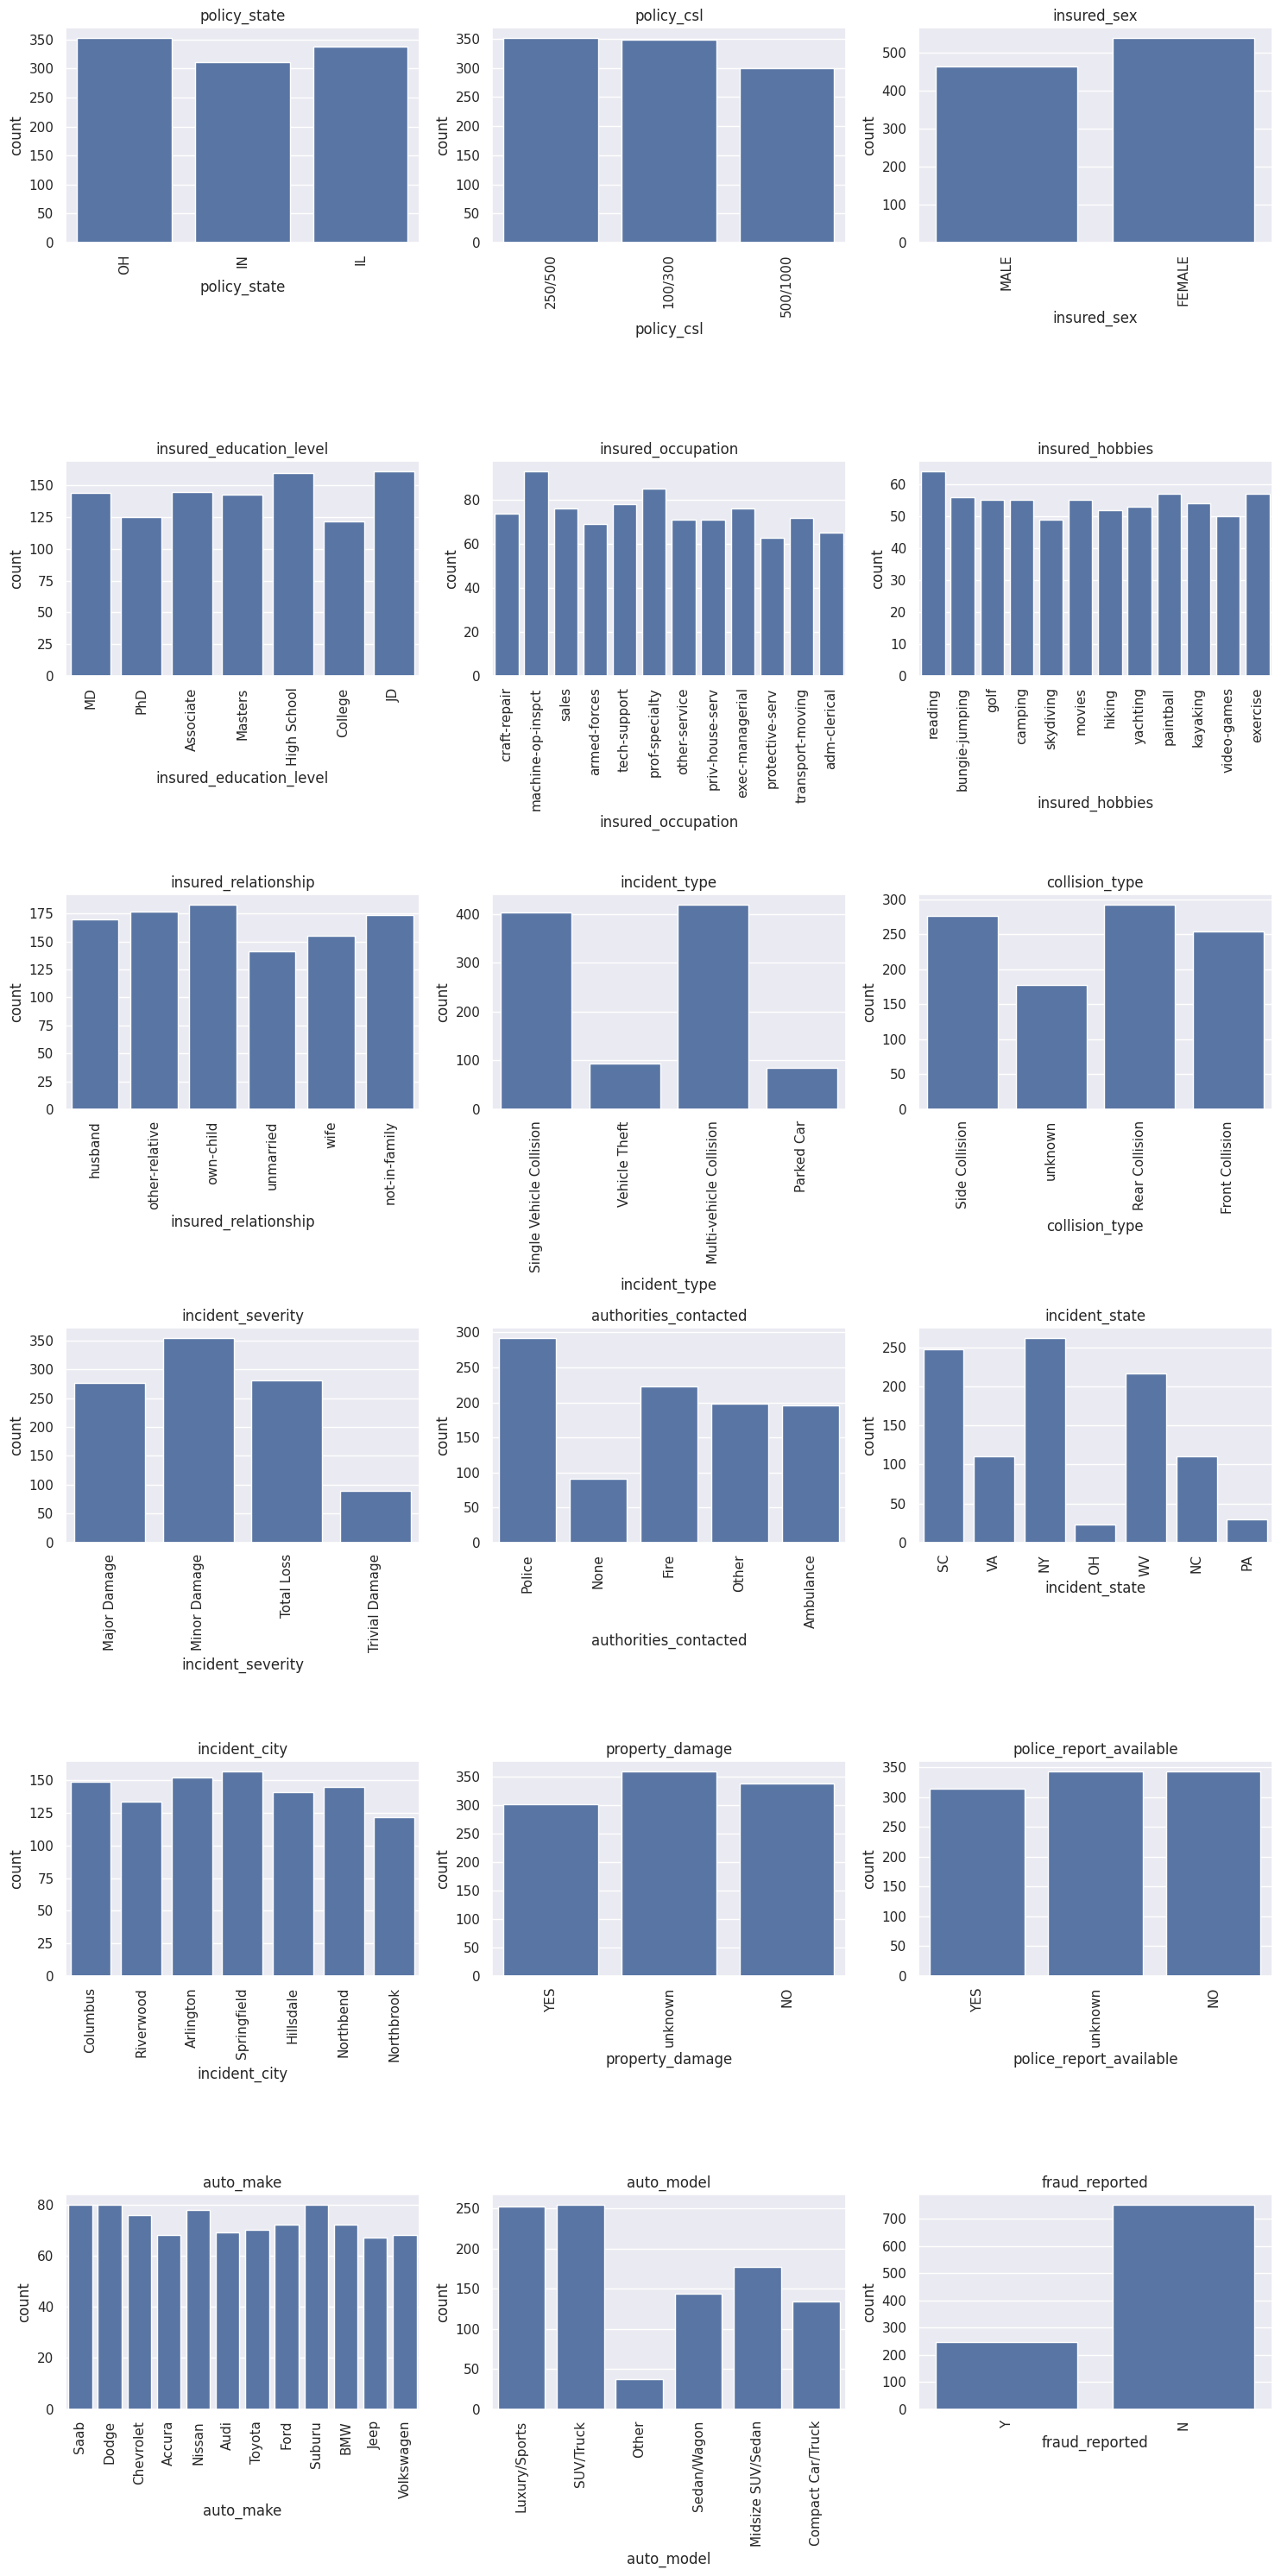

In [ ]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 5 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(12).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

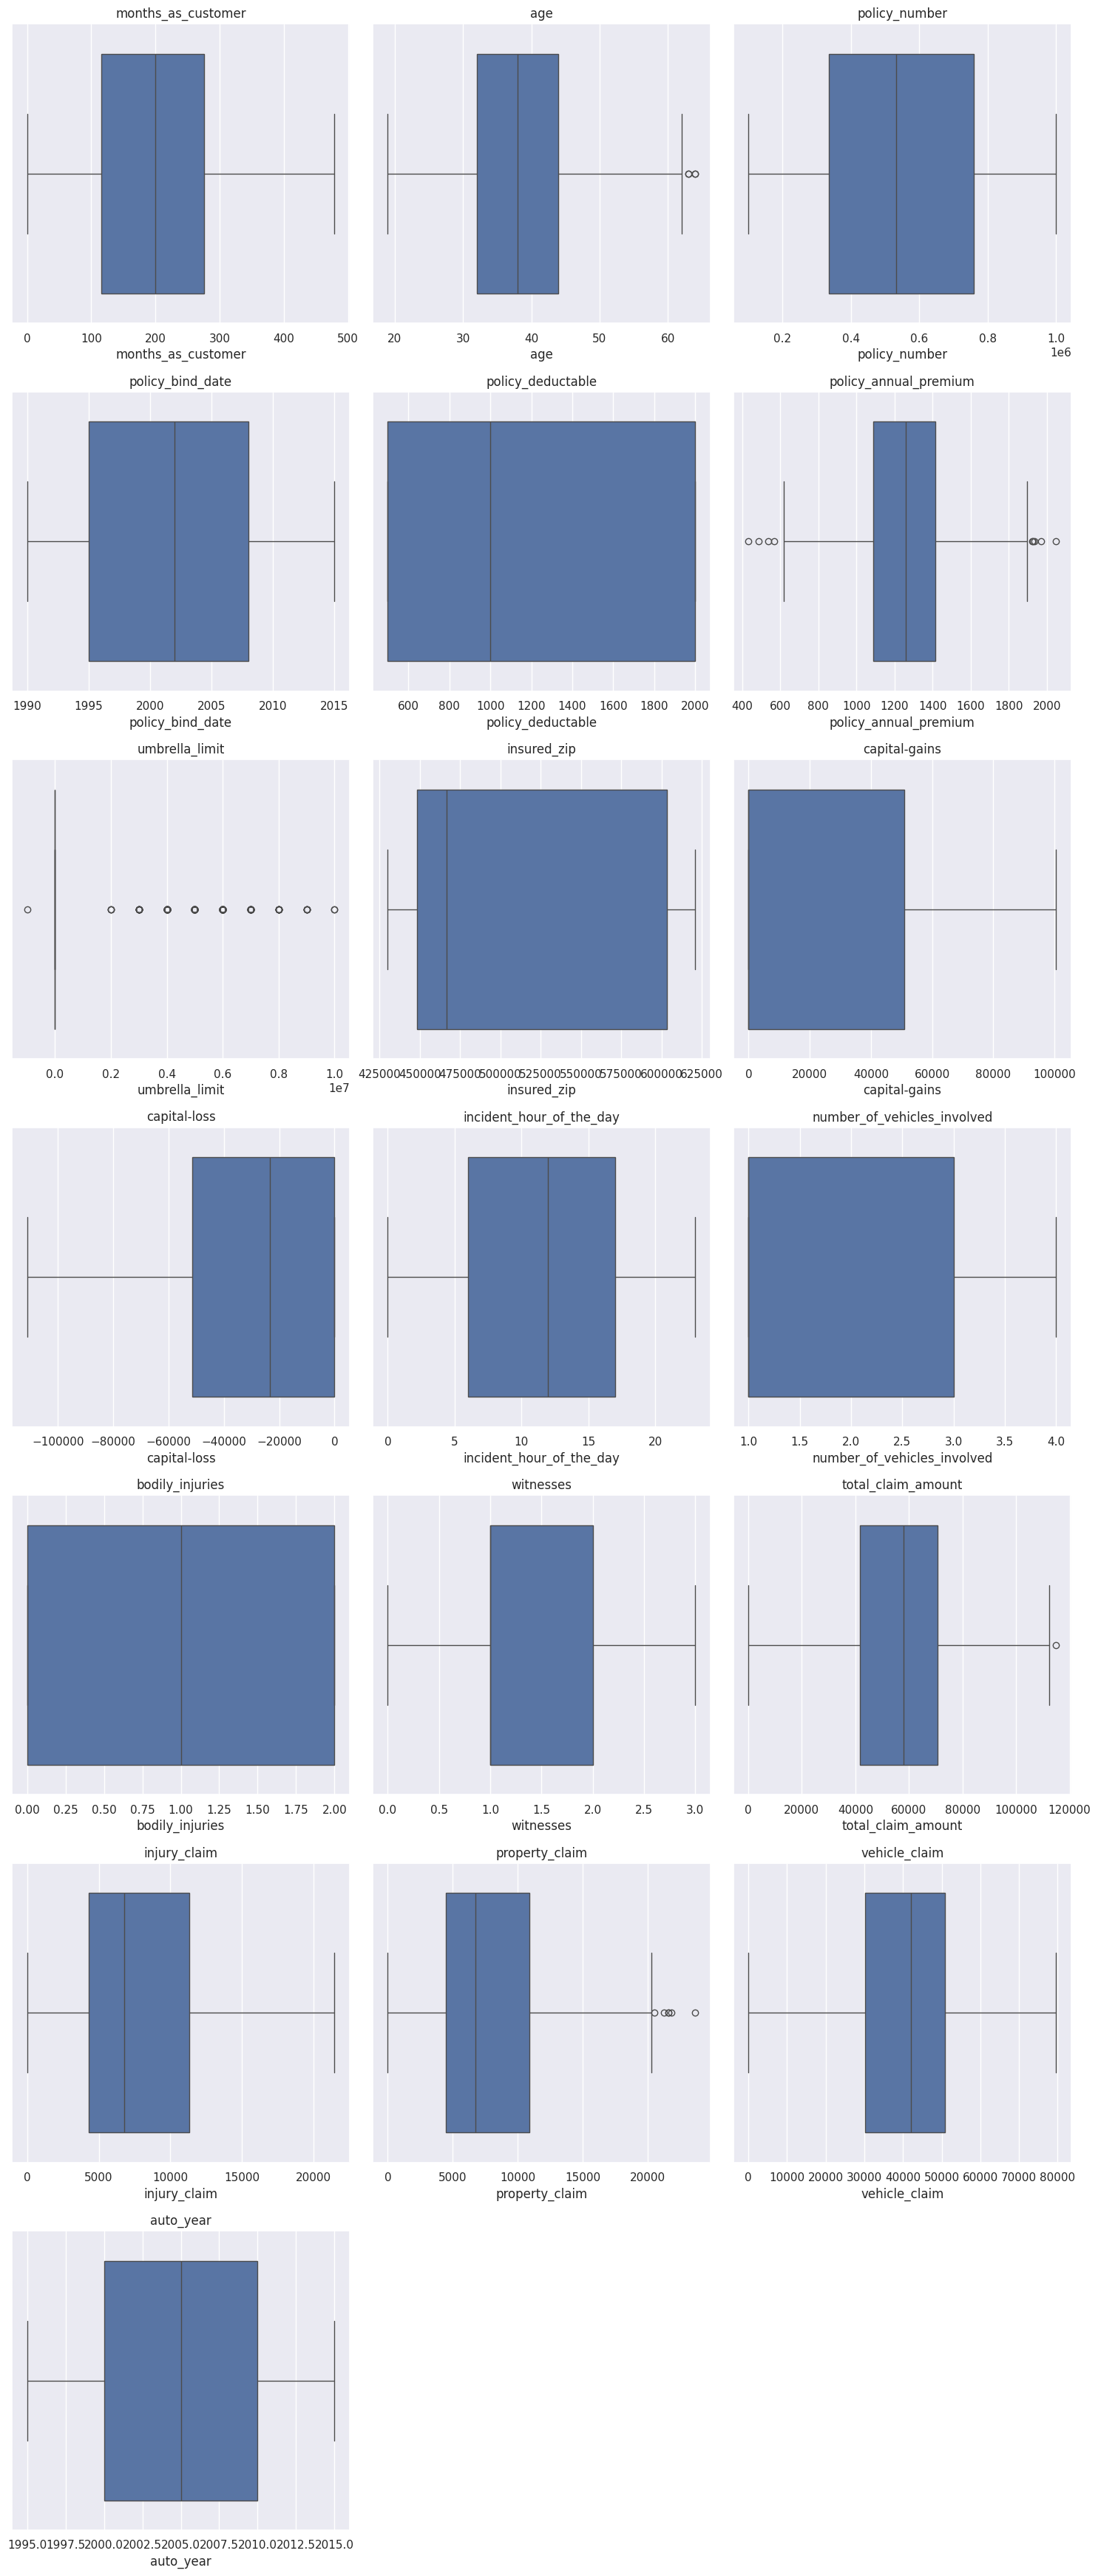

In [ ]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

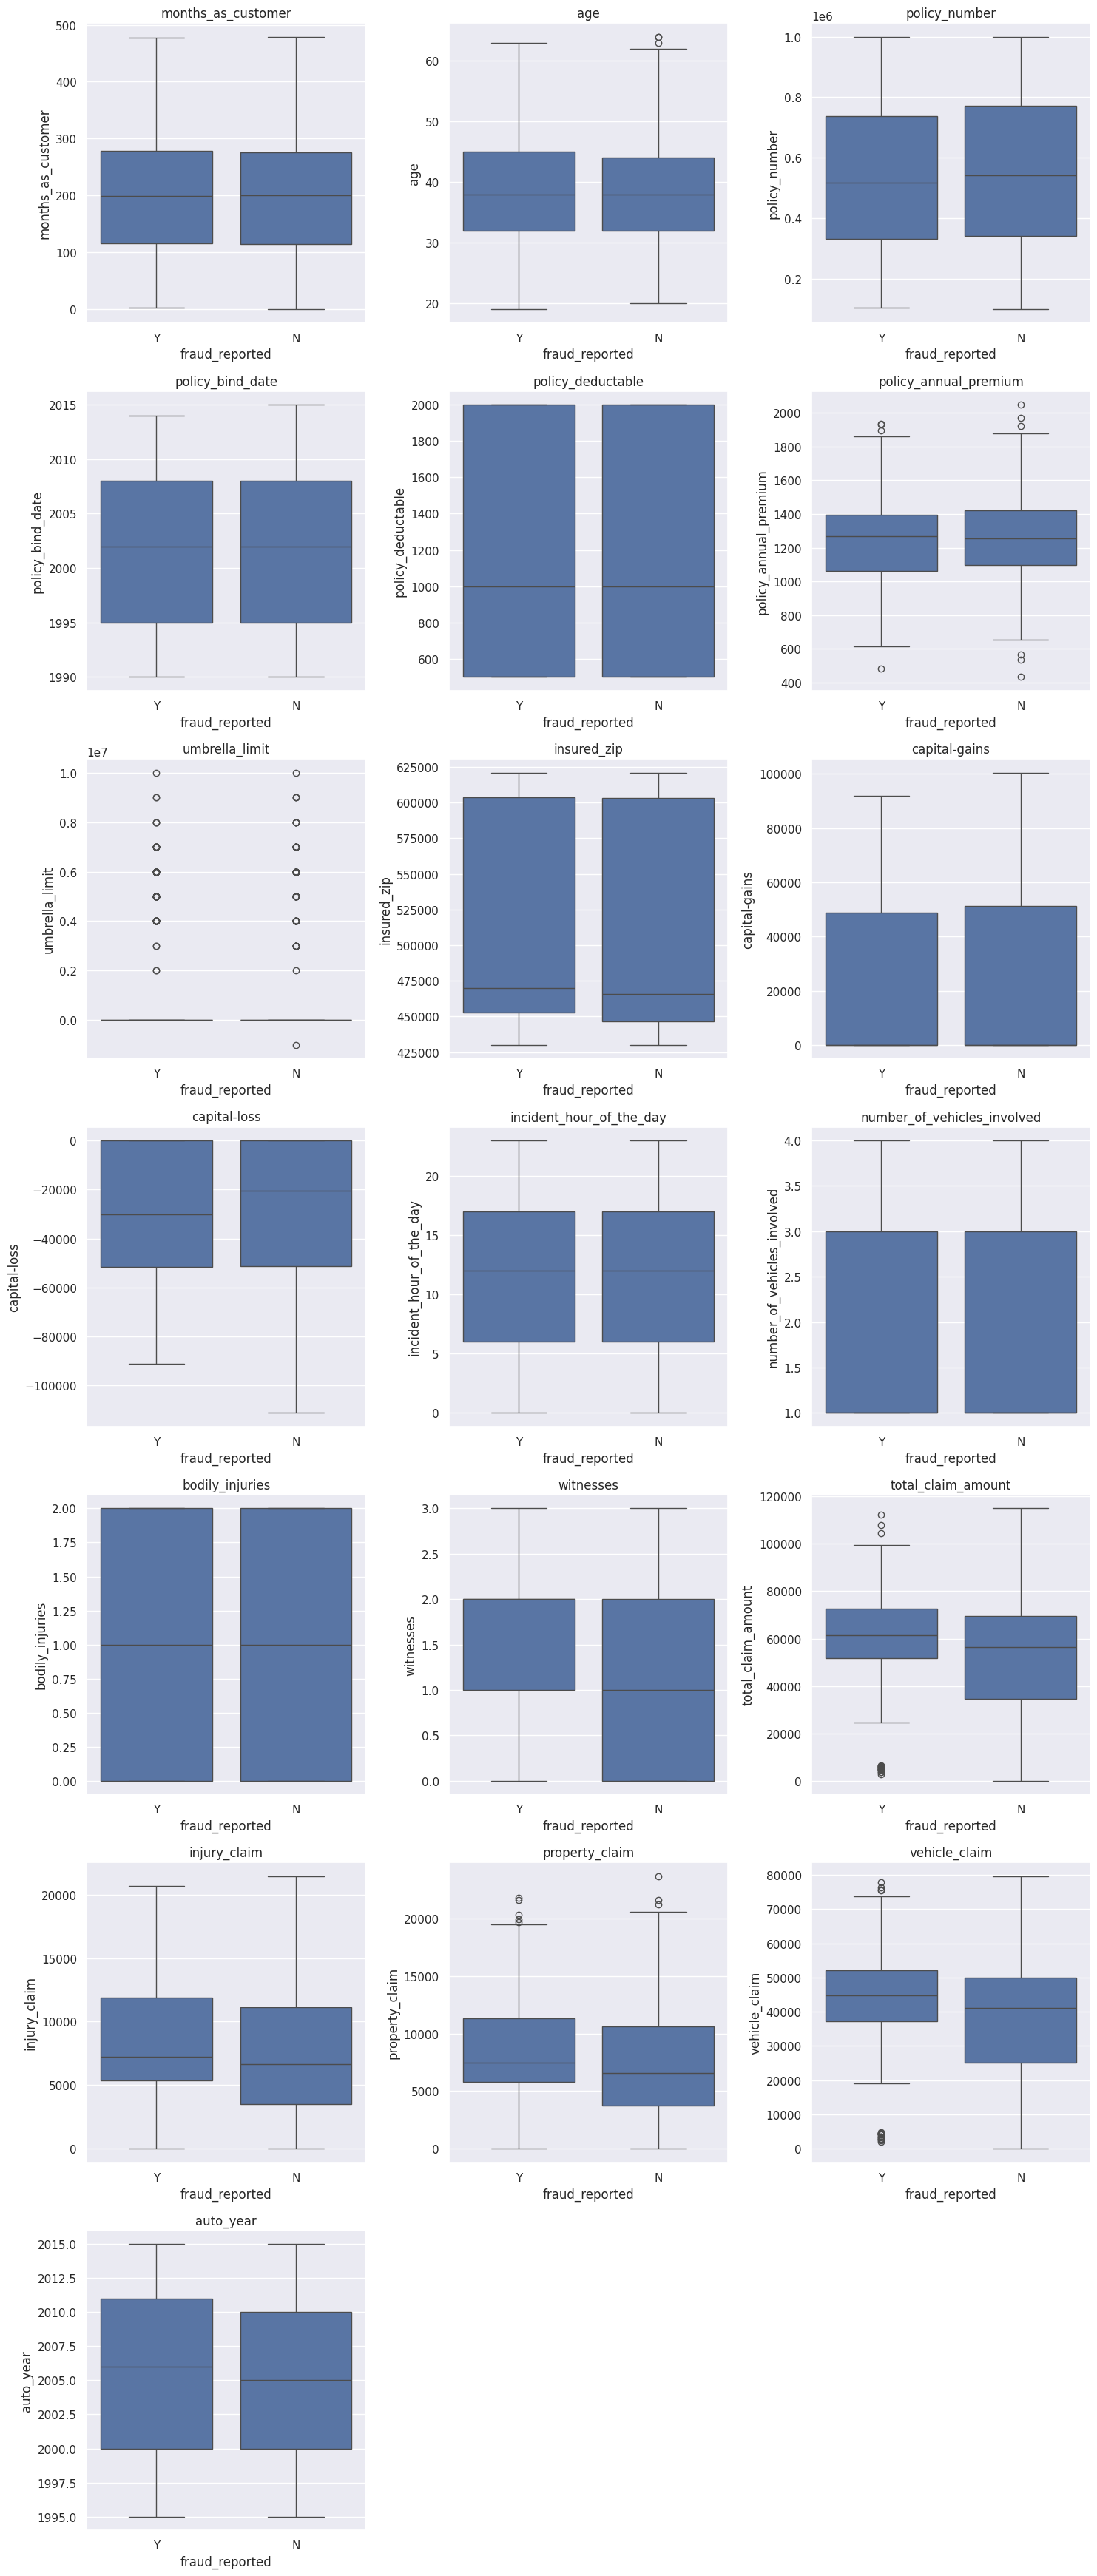

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='fraud_reported', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

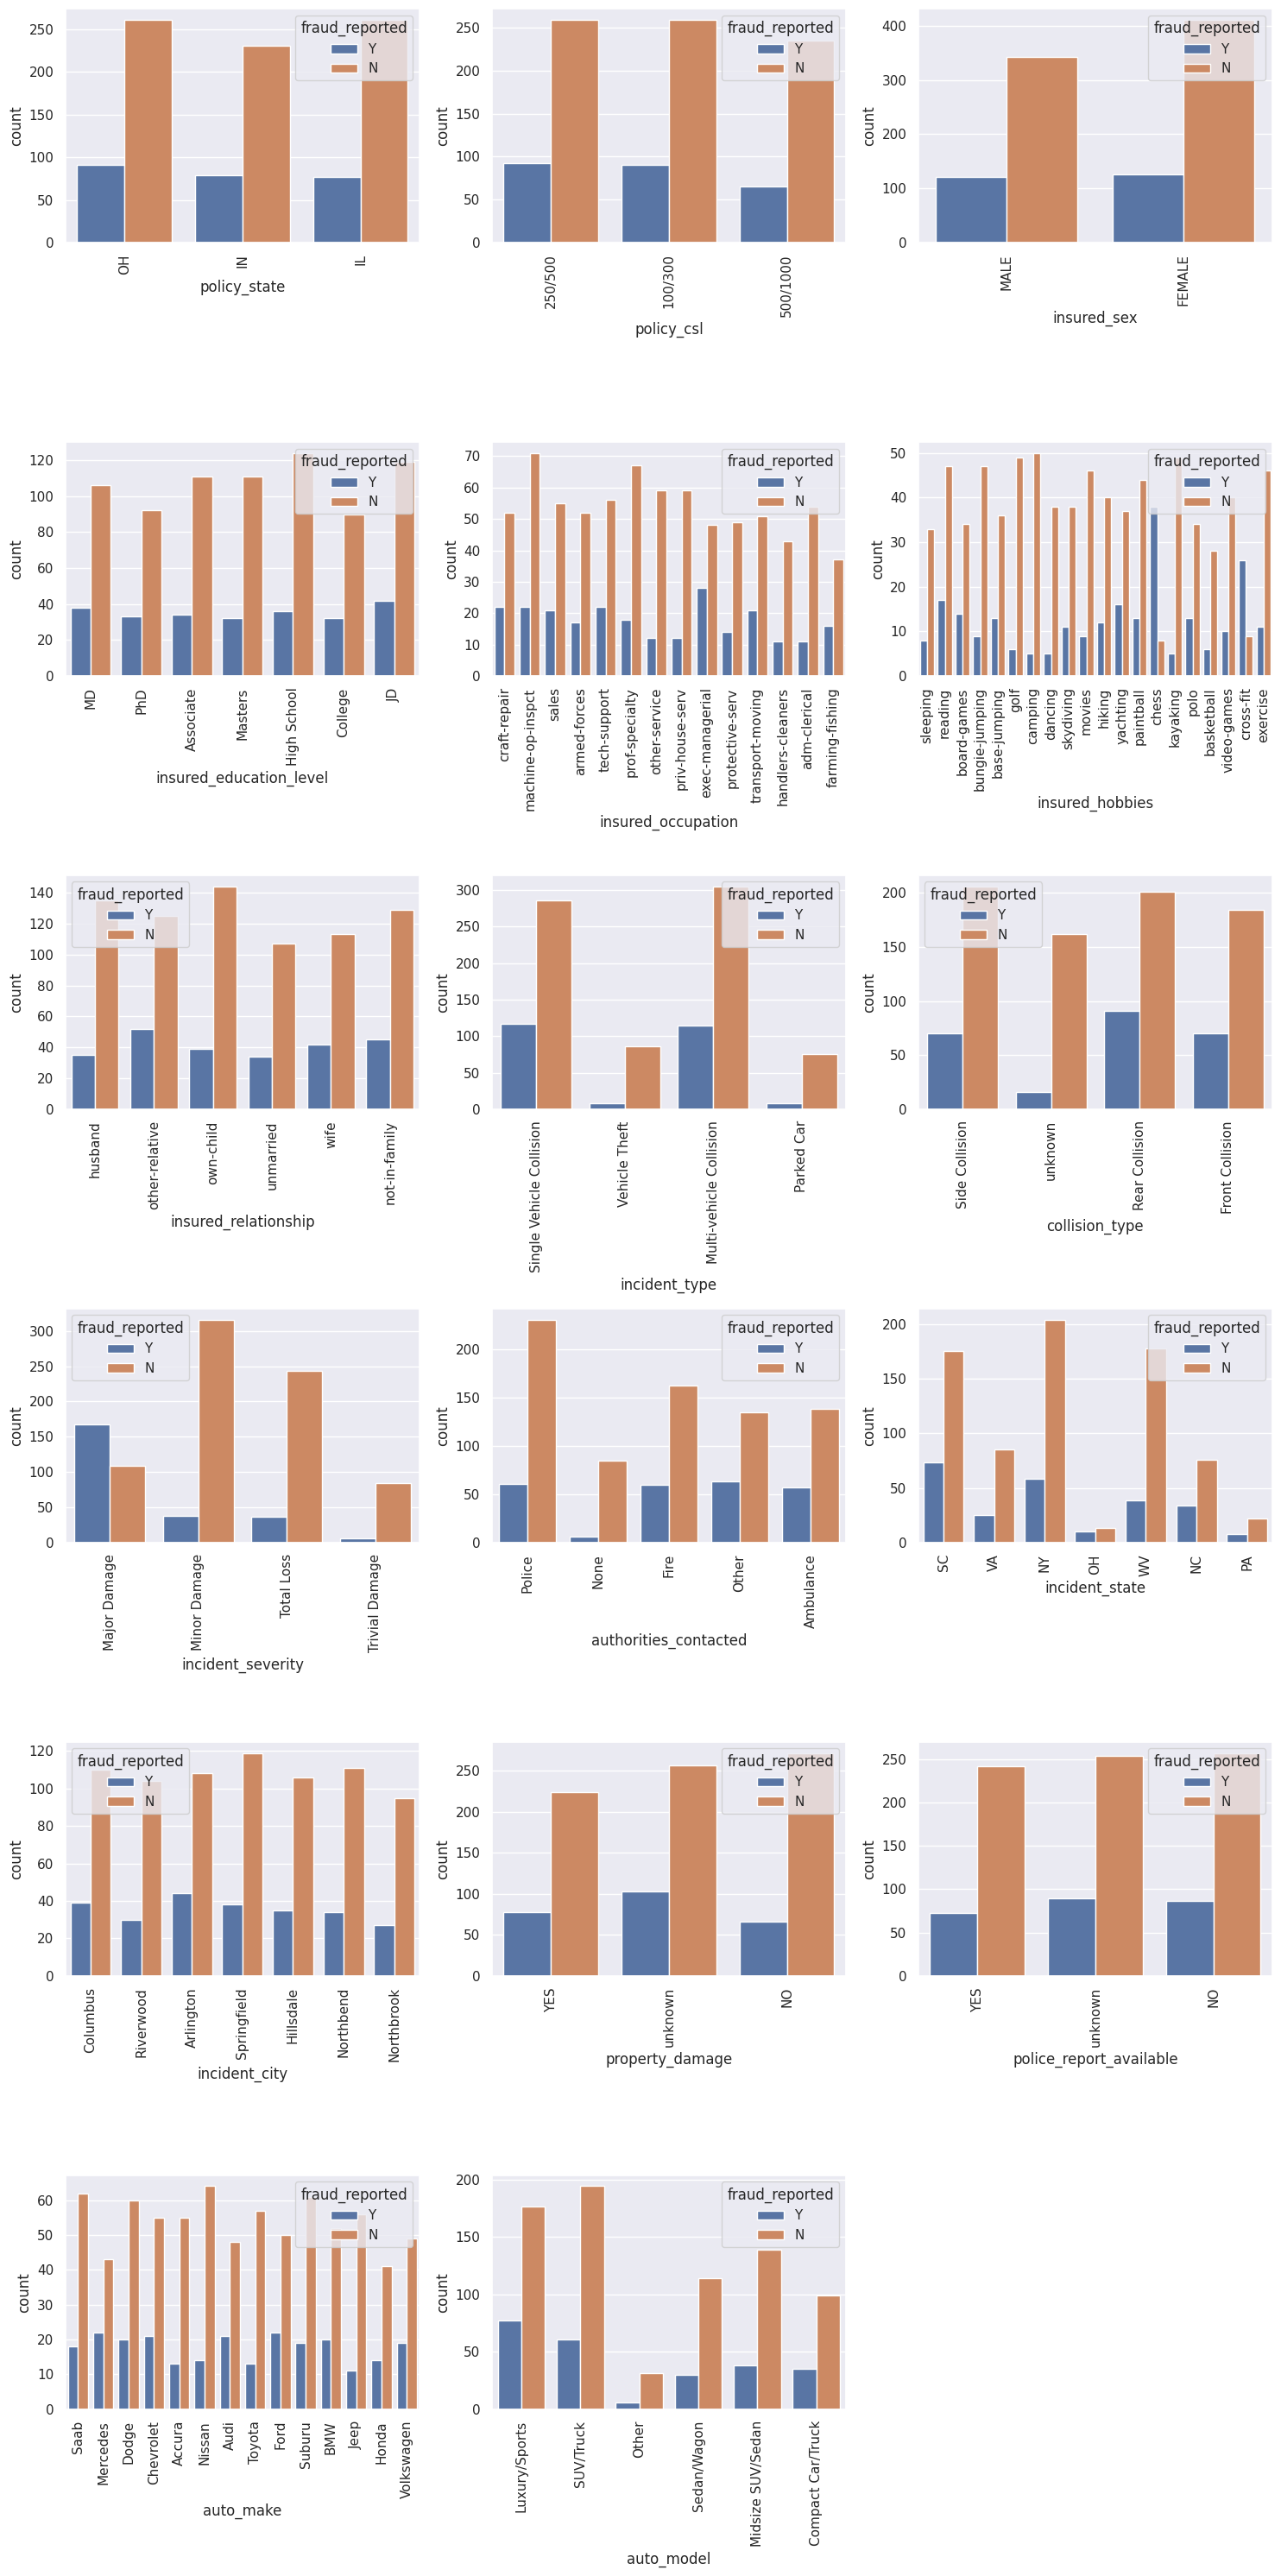

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Remove 'fraud_reported' from the list of categorical variables
cat_vars = [var for var in cat_vars if var != 'fraud_reported']

# Calculate number of rows and columns for subplots
num_cols = min(len(cat_vars), 3)
num_rows = (len(cat_vars) + num_cols - 1) // num_cols

# Create a figure with subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Flatten the axs array if it's not already flattened
if num_rows > 1:
    axs = axs.flatten()

# Create a barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='fraud_reported', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove empty subplots
for j in range(len(cat_vars), len(axs)):
    fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

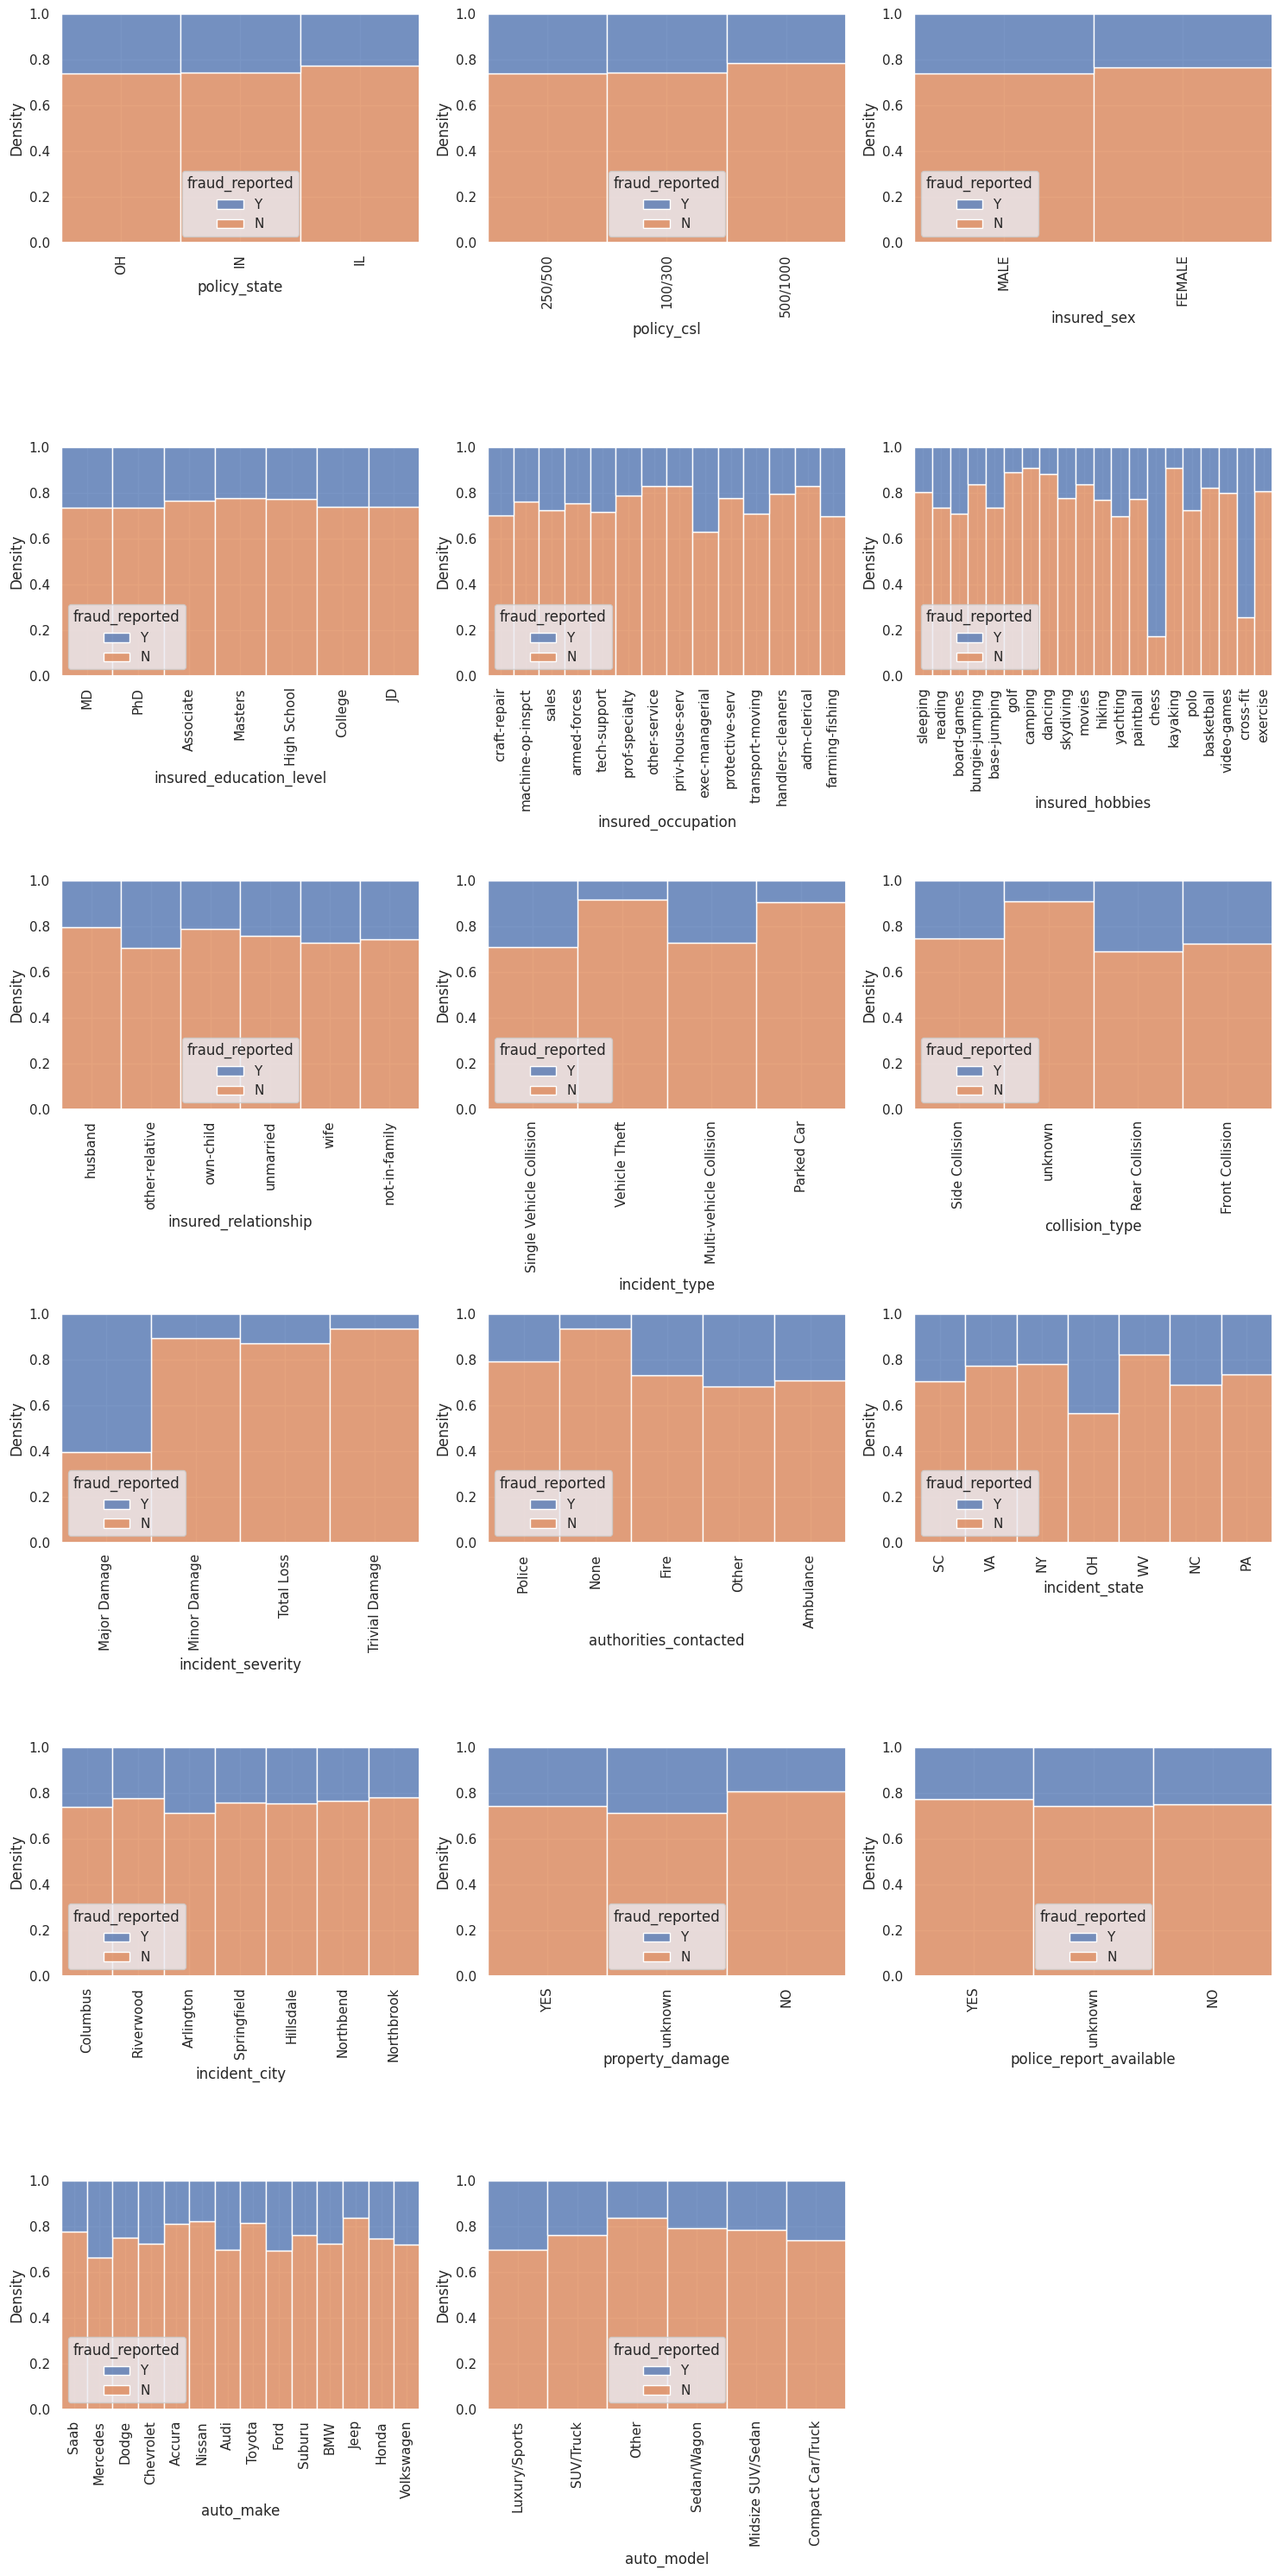

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Remove 'fraud_reported' from the list of categorical variables
cat_vars = [var for var in cat_vars if var != 'fraud_reported']

# Calculate number of rows and columns for subplots
num_cols = min(len(cat_vars), 3)
num_rows = (len(cat_vars) + num_cols - 1) // num_cols

# Create a figure with subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Flatten the axs array if it's not already flattened
if num_rows > 1:
    axs = axs.flatten()

# Create a barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='fraud_reported', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# Remove empty subplots
for j in range(len(cat_vars), len(axs)):
    fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# Data Preprocessing Part 2

In [ ]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Label Encoding for Object Datatypes

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

policy_state: ['OH' 'IN' 'IL']
policy_csl: ['250/500' '100/300' '500/1000']
insured_sex: ['MALE' 'FEMALE']
insured_education_level: ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_occupation: ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
insured_hobbies: ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
insured_relationship: ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
incident_type: ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
collision_type: ['Side Collision' 'unknown' 'Rear Collision' 'Front Collision']
incident_severity: ['Maj

In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

policy_state: [2 1 0]
policy_csl: [1 0 2]
insured_sex: [1 0]
insured_education_level: [4 6 0 5 2 1 3]
insured_occupation: [ 2  6 11  1 12  9  7  8  3 10 13  5  0  4]
insured_hobbies: [17 15  2  3  0  9  4  7 16 12 10 19 13  5 11 14  1 18  6  8]
insured_relationship: [0 2 3 4 5 1]
incident_type: [2 3 0 1]
collision_type: [2 3 1 0]
incident_severity: [0 1 2 3]
authorities_contacted: [4 2 1 3 0]
incident_state: [4 5 1 2 6 0 3]
incident_city: [1 5 0 6 2 3 4]
property_damage: [1 2 0]
police_report_available: [1 2 0]
auto_make: [10  8  4  3  0  9  1 12  5 11  2  7  6 13]
auto_model: [1 4 3 5 2 0]
fraud_reported: [1 0]


# Correlation Heatmap

<Axes: >

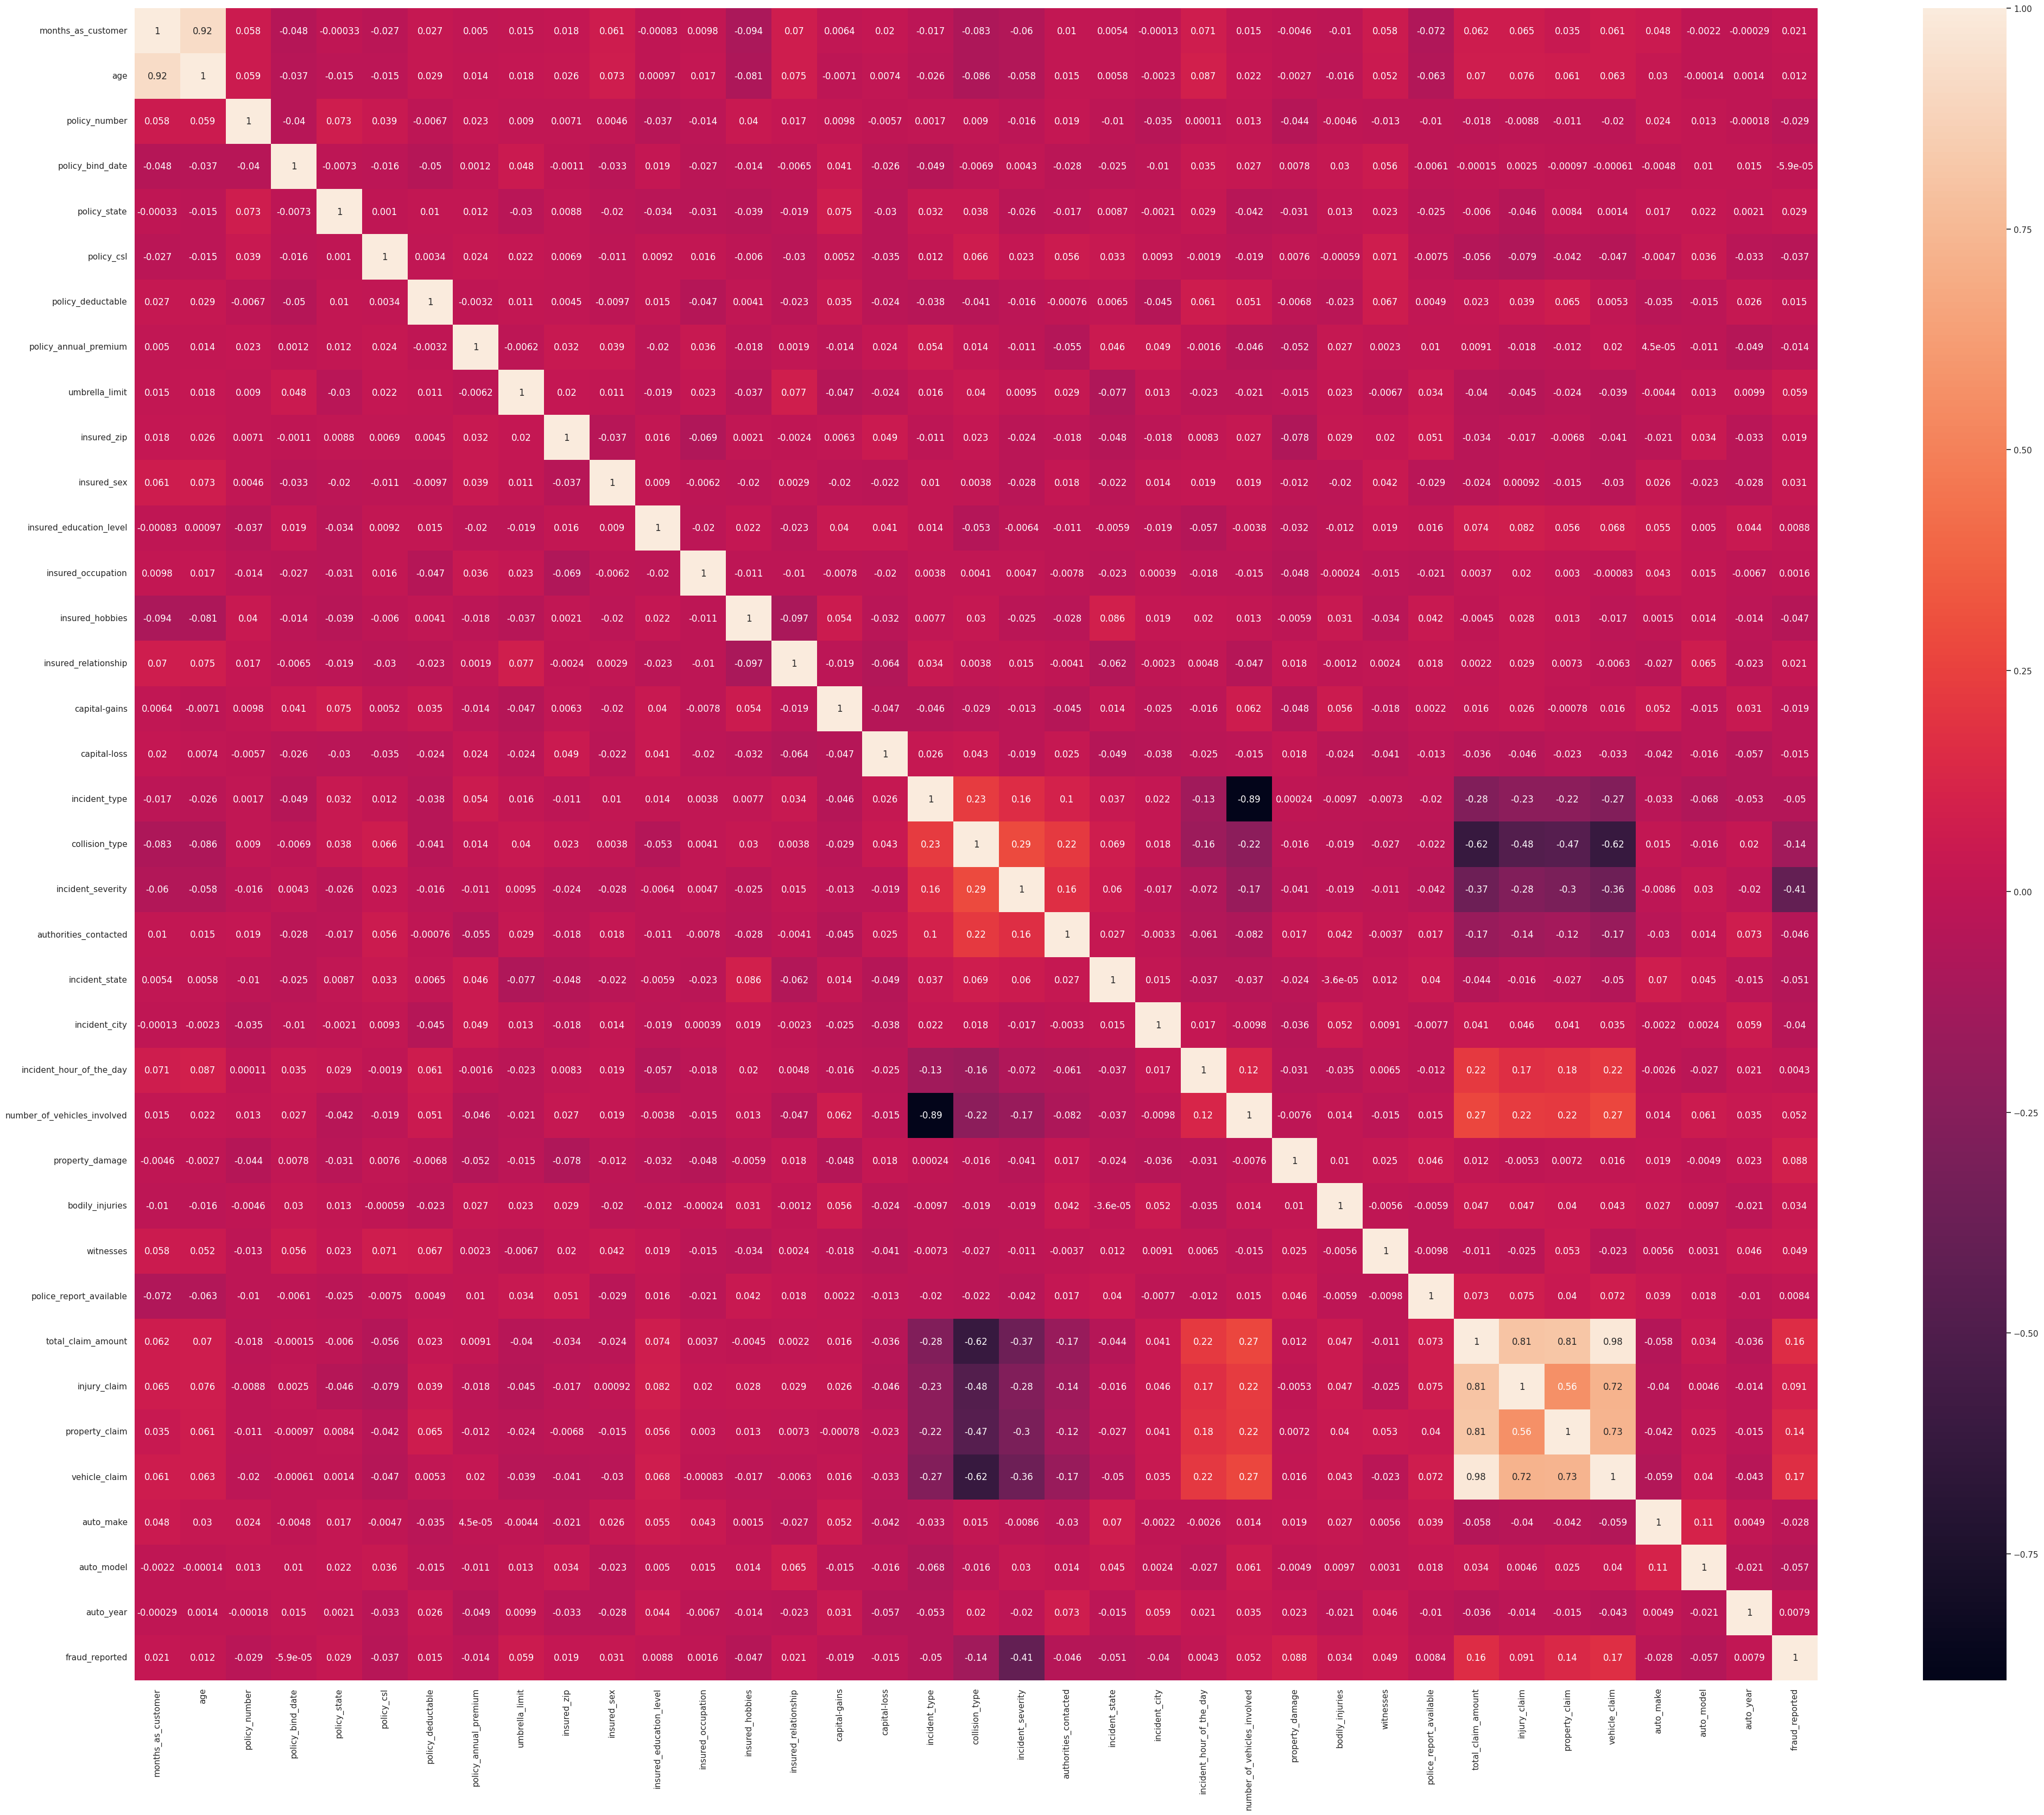

In [ ]:
plt.figure(figsize=(50, 40))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [ ]:
# Remove column that have correlation with each other
df.drop(columns = ['vehicle_claim', 'months_as_customer', 'property_claim', 'injury_claim'], inplace=True)
df.head()

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
0,48,521585,2014,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,10,1,2004,1
1,42,342868,2006,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,3,1,4,5,5,8,1,2,0,0,2,5070,8,1,2007,1
2,29,687698,2000,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,4,4,2007,0
3,41,227811,1990,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,2,1,2,0,63400,3,4,2014,1
4,44,367455,2014,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,3,1,2,1,0,20,1,0,0,1,0,6500,0,3,2009,0


In [ ]:
df.shape

(1000, 33)

# Min Max Scaler for all of Column

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax scaling to all integer columns
df[df.columns] = scaler.fit_transform(df[df.columns])

In [ ]:
df.head()

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
0,0.644444,0.468247,0.96,1.0,0.5,0.333333,0.603112,0.090909,0.188769,1.0,0.666667,0.153846,0.894737,0.0,0.530348,1.000000,0.666667,0.666667,0.000000,1.0,0.666667,0.166667,0.217391,0.000000,0.5,0.5,0.666667,0.5,0.622801,0.769231,0.2,0.45,1.0
1,0.511111,0.269370,0.64,0.5,0.5,1.000000,0.473214,0.545455,0.199478,1.0,0.666667,0.461538,0.789474,0.4,0.000000,1.000000,1.000000,1.000000,0.333333,1.0,0.833333,0.833333,0.347826,0.000000,1.0,0.0,0.000000,1.0,0.043285,0.615385,0.2,0.60,1.0
2,0.222222,0.653098,0.40,1.0,0.0,1.000000,0.606972,0.545455,0.002766,0.0,1.000000,0.846154,0.105263,0.6,0.349254,1.000000,0.000000,0.333333,0.333333,1.0,0.166667,0.166667,0.304348,0.666667,0.0,1.0,1.000000,0.0,0.300906,0.307692,0.8,0.60,0.0
3,0.488889,0.141334,0.00,0.0,0.5,1.000000,0.608582,0.636364,0.932699,0.0,1.000000,0.076923,0.105263,0.8,0.486567,0.438344,0.666667,0.000000,0.000000,1.0,0.333333,0.000000,0.217391,0.000000,1.0,0.5,0.666667,0.0,0.551298,0.230769,0.8,0.95,1.0
4,0.555556,0.296730,0.96,0.0,1.0,0.333333,0.712760,0.636364,0.946264,1.0,0.000000,0.846154,0.105263,0.8,0.656716,0.585959,1.000000,1.000000,0.333333,0.5,0.166667,0.000000,0.869565,0.000000,0.0,0.0,0.333333,0.0,0.055739,0.000000,0.6,0.70,0.0


# Train Test Split

In [ ]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Machine Learning Modelling with Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_labels = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train)
class_weights_dict = dict(zip(class_labels, class_weights))

# Define the model architecture
model = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

# Compile the model with adjusted learning rate and optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with adjusted batch size and epochs, and class weights
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, class_weight=class_weights_dict)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/20
10/10 [==============================] - 1s 29ms/step - loss: 0.6693 - accuracy: 0.6000 - val_loss: 0.6806 - val_accuracy: 0.5750
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 0.6184 - accuracy: 0.6406 - val_loss: 0.5601 - val_accuracy: 0.7063
Epoch 3/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6031 - accuracy: 0.6594 - val_loss: 0.5950 - val_accuracy: 0.6562
Epoch 4/20
10/10 [==============================] - 0s 14ms/step - loss: 0.5774 - accuracy: 0.7422 - val_loss: 0.6255 - val_accuracy: 0.6625
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.5604 - accuracy: 0.7141 - val_loss: 0.6064 - val_accuracy: 0.6687
Epoch 6/20
10/10 [==============================] - 0s 14ms/step - loss: 0.5474 - accuracy: 0.7406 - val_loss: 0.5634 - val_accuracy: 0.6938
Epoch 7/20
10/10 [==============================] - 0s 14ms/step - loss: 0.5384 - accuracy: 0.7453 - val_loss: 0.6243 - val_accuracy: 0.6750
Epoch 8/20
10/

# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy, " %")

7/7 [==============================] - 0s 3ms/step
Accuracy: 76.0  %


# Precision Recall F-1 Score

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Multiply each metric by 100 to convert them into percentages
precision_percent = precision * 100
recall_percent = recall * 100
f1_score_percent = f1_score * 100

# Print the metrics with percentages
print("Precision:", precision_percent, "%")
print("Recall:", recall_percent, "%")
print("F1-score:", f1_score_percent, "%")

Precision: 56.71641791044776 %
Recall: 66.66666666666666 %
F1-score: 61.29032258064515 %


# ROC Score

In [ ]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for the positive class (class 1)
y_pred_prob = model.predict(X_test)

# Extract probabilities for the positive class
y_pred_prob_positive = y_pred_prob[:, 0]  # Assuming class 1 is the positive class

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob_positive)
print("ROC-AUC:", roc_auc)

7/7 [==============================] - 0s 3ms/step
ROC-AUC: 0.7638326585695008
